# Import data

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import numpy as np

def column_df_to_row(column_df):
    return column_df.to_numpy()[:, 0]
def np_back_to_df(original_df, array):
    return pd.DataFrame(array, index=original_df.index, columns=original_df.columns)

main_data = pd.read_csv("2017_2018_2019.csv") 
label_column = 'ttl_pts'

print("Shape: ", main_data.shape)

main_input = main_data.loc[:, main_data.columns != label_column]
main_output = main_data[[label_column]]

Shape:  (3690, 103)


# Divide into training and testing
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [105]:
init_train, init_test, init_train_label, init_test_label = train_test_split(main_input, main_output, test_size=.3, random_state=42)
print("Training shape: ", init_train.shape)
print("Testing shape: ", init_test.shape)

Training shape:  (2583, 102)
Testing shape:  (1107, 102)
[229 225 212 ... 247 217 194]


# Describe training data
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


In [47]:
init_train.describe()


,a_ast,a_ast_pct,a_blk,a_blk_pct,a_def_reb_pct,a_def_rtg,a_efg,a_fg,a_fg3,a_fg3_pct,...,h_pace,h_pf,h_pts,h_stl,h_stl_pct,h_to,h_to_pct,h_trb,h_trb_pct,h_ts_pct
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,...,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,22.963724,57.937913,4.914762,8.569210,77.210387,109.097108,0.514177,39.561758,10.263984,0.355912,...,97.721580,20.774290,107.165703,7.780333,7.900089,14.001018,12.625079,44.190124,50.055695,0.552586
std,2.469255,4.657414,0.930033,1.598033,2.227135,3.551560,0.026237,2.100166,1.783413,0.027977,...,3.063122,1.921707,5.666703,1.046269,1.052252,1.465959,1.187691,2.627073,1.991376,0.024880
min,12.000000,32.400000,0.000000,0.000000,61.800000,77.000000,0.360000,25.000000,4.000000,0.180000,...,89.990000,15.000000,76.000000,2.000000,2.100000,8.000000,7.300000,33.000000,36.300000,0.390000
25%,21.320000,54.990000,4.320000,7.660000,76.010000,107.120000,0.500000,38.295000,9.080000,0.340000,...,95.560000,19.560000,103.335000,7.070000,7.220000,13.035000,11.840000,42.550000,48.785000,0.540000
50%,22.730000,57.900000,4.930000,8.500000,77.130000,109.320000,0.510000,39.370000,10.200000,0.350000,...,97.500000,20.600000,106.580000,7.750000,7.940000,13.830000,12.510000,44.170000,50.100000,0.550000
75%,24.230000,61.060000,5.450000,9.530000,78.460000,111.385000,0.530000,40.770000,11.330000,0.370000,...,99.650000,22.000000,111.210000,8.395000,8.510000,14.910000,13.270000,45.660000,51.310000,0.570000
max,32.050000,74.250000,10.330000,16.530000,90.400000,130.600000,0.620000,48.000000,18.000000,0.580000,...,113.500000,32.000000,130.000000,16.000000,14.900000,21.000000,18.400000,58.000000,67.100000,0.690000


# Standardize data
https://scikit-learn.org/stable/modules/preprocessing.html

Then describe training data again

In [110]:
def scale_dataframe(df):
    scaled_values = preprocessing.scale(df)
    return np_back_to_df(df, scaled_values)
scaled_train = scale_dataframe(init_train)
scaled_test = scale_dataframe(init_test)

display(scaled_train.describe())
display(scaled_train.head())

,a_ast,a_ast_pct,a_blk,a_blk_pct,a_def_reb_pct,a_def_rtg,a_efg,a_fg,a_fg3,a_fg3_pct,...,h_pace,h_pf,h_pts,h_stl,h_stl_pct,h_to,h_to_pct,h_trb,h_trb_pct,h_ts_pct
count,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,...,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03
mean,-6.602023e-17,-4.346332e-16,8.166565e-16,-3.060313e-16,1.459322e-15,2.594045e-15,-7.289734e-17,5.212847e-16,1.595489e-16,2.186920e-16,...,-1.828623e-15,-1.354790e-15,-6.265045e-16,4.896500e-16,1.705523e-16,-1.572107e-15,-2.338217e-16,1.049447e-15,8.211266e-16,2.263944e-15
std,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,...,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00
min,-4.440955e+00,-5.484343e+00,-5.285526e+00,-5.363388e+00,-6.920717e+00,-9.039218e+00,-5.877421e+00,-6.934966e+00,-3.513037e+00,-6.288844e+00,...,-2.524574e+00,-3.005353e+00,-5.500860e+00,-5.525779e+00,-5.513137e+00,-4.094372e+00,-4.484423e+00,-4.260366e+00,-6.908972e+00,-6.536018e+00
25%,-6.658052e-01,-6.330732e-01,-6.396300e-01,-5.690661e-01,-5.390870e-01,-5.567950e-01,-5.404559e-01,-6.032871e-01,-6.640150e-01,-5.688444e-01,...,-7.058153e-01,-6.320031e-01,-6.761329e-01,-6.790514e-01,-6.464425e-01,-6.590944e-01,-6.611409e-01,-6.244370e-01,-6.382226e-01,-5.059671e-01
50%,-9.467214e-02,-8.141990e-03,1.638764e-02,-4.331802e-02,-3.610141e-02,6.277105e-02,-1.592441e-01,-9.132364e-02,-3.588407e-02,-2.113444e-01,...,-7.235183e-02,-9.071276e-02,-1.033786e-01,-2.899715e-02,3.793641e-02,-1.166822e-01,-9.691208e-02,-7.661677e-03,2.225278e-02,-1.039637e-01
75%,5.129163e-01,6.704775e-01,5.756158e-01,6.013493e-01,5.611940e-01,6.443183e-01,6.031795e-01,5.754195e-01,5.978551e-01,5.036556e-01,...,6.296824e-01,6.379473e-01,7.138332e-01,5.875984e-01,5.797364e-01,6.201796e-01,5.431087e-01,5.596193e-01,6.299906e-01,7.000431e-01
max,3.680477e+00,3.503070e+00,5.823757e+00,4.982583e+00,5.923380e+00,6.055665e+00,4.034086e+00,4.018672e+00,4.338599e+00,8.011156e+00,...,5.152089e+00,5.842662e+00,4.030336e+00,7.857691e+00,6.653600e+00,4.775262e+00,4.863249e+00,5.257772e+00,8.560718e+00,5.524084e+00


,a_ast,a_ast_pct,a_blk,a_blk_pct,a_def_reb_pct,a_def_rtg,a_efg,a_fg,a_fg3,a_fg3_pct,...,h_pace,h_pf,h_pts,h_stl,h_stl_pct,h_to,h_to_pct,h_trb,h_trb_pct,h_ts_pct
3176,2.505806,1.707734,1.532756,1.571480,0.682449,0.400716,2.128027,2.189890,1.483968,1.218656,...,1.041107,0.268413,1.043895,1.099038,0.769842,-0.143973,-0.459029,-1.187911,-1.951640,0.700043
3415,1.630879,0.872345,0.758440,0.676456,-0.049574,0.938612,0.984391,1.932718,-0.125617,0.146156,...,0.694988,0.159114,0.542625,0.391626,0.256557,0.572420,0.501002,0.670030,0.770624,0.700043
1235,0.824812,0.034809,1.167107,-0.356263,-3.327962,1.690540,0.984391,1.637446,2.656105,2.648656,...,2.148036,-0.402996,2.265300,0.209993,-0.190190,-3.412092,-4.484423,2.973419,0.976552,-0.907970
2610,0.674940,0.511560,-0.306244,-0.662950,-2.295046,0.366922,0.984391,0.684956,1.478360,0.146156,...,0.521928,1.678890,-1.158870,-1.510738,-1.606474,3.069563,3.557943,-0.757691,-0.038019,-0.103964
1459,-0.580743,0.253857,-0.919244,-0.888270,2.177933,-2.959022,-0.921668,-1.558159,0.311831,-0.211344,...,0.244380,0.377712,-0.579938,1.280671,1.340157,1.227408,1.519982,-1.069886,-1.193223,-0.103964


# Correlation Heatmap
https://seaborn.pydata.org/generated/seaborn.heatmap.html

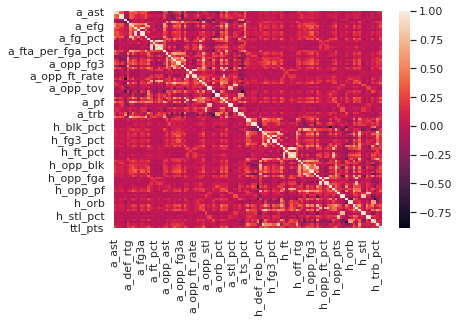

In [137]:
def plot_correlation_heatmap(input, labels, ax=None):
    merged = pd.concat([input, init_train_label], axis=1)
    sns.heatmap(merged.corr(method='pearson'), ax=ax)
plot_correlation_heatmap(scaled_train, init_train_label)

# Feature selection
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

,a_fg,a_fga,a_opp_ast,a_opp_fg,a_opp_fga,a_opp_pts,a_pace,a_pts,h_def_rtg,h_fg,h_fga,h_off_rtg,h_opp_ast,h_opp_fg,h_opp_fg3,h_opp_fg3a,h_opp_fga,h_opp_pts,h_pace,h_pts
3176,2.189890,1.074060,0.514747,0.546360,1.074315,0.925873,0.958594,2.139461,1.080892,1.064841,1.104225,0.242576,1.295115,1.322219,1.305909,1.114385,0.836790,1.657416,1.041107,1.043895
3415,1.932718,1.459411,1.645790,1.388341,1.388544,1.491826,1.544528,1.616562,-0.624909,0.037451,-0.215987,0.216417,-0.829919,0.161452,-0.164373,-0.232518,0.383395,-0.049361,0.694988,0.542625
1235,1.637446,2.058847,-1.072863,1.145736,2.849431,2.432556,2.206600,1.442263,0.353654,1.126390,3.393915,1.443545,1.033335,1.582231,3.583705,1.896960,1.721462,1.461192,2.148036,2.265300
2610,0.684956,0.830333,-1.778468,-0.024474,0.443101,0.280422,-0.017963,0.428810,1.457880,-1.434984,-1.638771,-1.783612,2.111251,1.535800,-0.903324,-0.101569,-0.296696,1.239052,0.521928,-1.158870
1459,-1.558159,-0.730836,-1.192193,-1.955795,-1.172144,-2.411165,-0.587345,-0.809255,0.310875,-0.350780,-0.490617,-0.799056,1.064133,-0.014984,0.925007,1.232862,-0.163995,0.259784,0.244380,-0.579938


,a_ast,a_def_rtg,a_fg,a_opp_fg,a_opp_fga,a_opp_pts,a_pace,a_pts,a_ts_pct,h_def_rtg,h_fg,h_ft,h_fta,h_opp_ast,h_opp_fg,h_opp_pts,h_pace,h_pf,h_pts,h_ts_pct
3176,2.505806,0.400716,2.189890,0.546360,1.074315,0.925873,0.958594,2.139461,1.957105,1.080892,1.064841,0.263461,0.355430,1.295115,1.322219,1.657416,1.041107,0.268413,1.043895,0.700043
3415,1.630879,0.938612,1.932718,1.388341,1.388544,1.491826,1.544528,1.616562,0.734861,-0.624909,0.037451,0.617335,1.031083,-0.829919,0.161452,-0.049361,0.694988,0.159114,0.542625,0.700043
1235,0.824812,1.690540,1.637446,1.145736,2.849431,2.432556,2.206600,1.442263,0.734861,0.353654,1.126390,5.409918,5.285586,1.033335,1.582231,1.461192,2.148036,-0.402996,2.265300,-0.907970
2610,0.674940,0.366922,0.684956,-0.024474,0.443101,0.280422,-0.017963,0.428810,0.327446,1.457880,-1.434984,-0.225845,-0.415237,2.111251,1.535800,1.239052,0.521928,1.678890,-1.158870,-0.103964
1459,-0.580743,-2.959022,-1.558159,-1.955795,-1.172144,-2.411165,-0.587345,-0.809255,-0.487383,0.310875,-0.350780,-1.069025,-1.361855,1.064133,-0.014984,0.259784,0.244380,0.377712,-0.579938,-0.103964


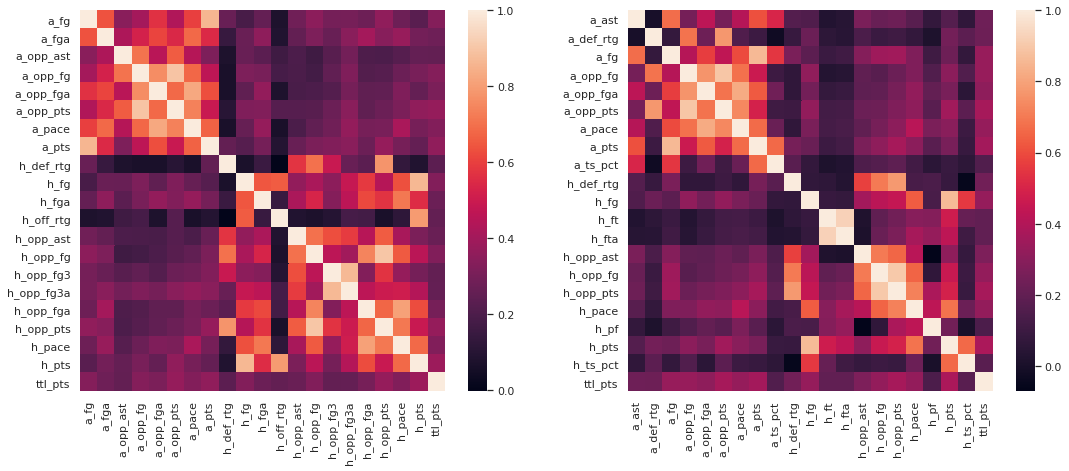

In [165]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def select_features(input, labels, method, k=20, ax=None):
    selector = SelectKBest(method, k=k)
    selector.fit(input, column_df_to_row(labels))
    selected = input.loc[:, selector.get_support()]
    display(selected.head())
    plot_correlation_heatmap(selected, labels, ax=ax)
    return selected
figure = plt.figure(figsize = (18,7))
ax1, ax2 = figure.subplots(1,2)
f_regression_select = select_features(scaled_train, init_train_label, f_regression, k=20, ax=ax1)
mutual_info_regression_select = select_features(scaled_train, init_train_label, mutual_info_regression, k=20, ax=ax2)

In [172]:
f_regression_columns = set(f_regression_select.columns)
mutual_info_columns = set(mutual_info_regression_select.columns)
display(f"Column diff {(f_regression_columns - mutual_info_columns) | (mutual_info_columns - f_regression_columns)}")

"Column diff {'a_opp_ast', 'h_fta', 'h_opp_fg3a', 'a_ast', 'h_pf', 'h_ft', 'a_def_rtg', 'h_fga', 'a_fga', 'h_off_rtg', 'h_opp_fg3', 'a_ts_pct', 'h_ts_pct', 'h_opp_fga'}"

# Feature Selection (Cont)
Notice how h_off_rg is highly correlated with many features. Same with h_def_rg

# Dimensionality Reduction with PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

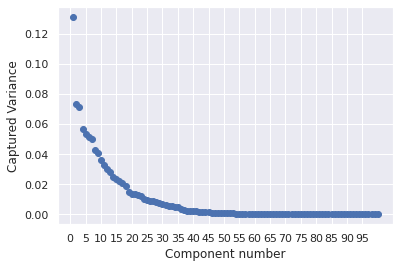

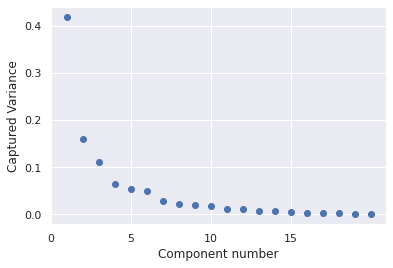

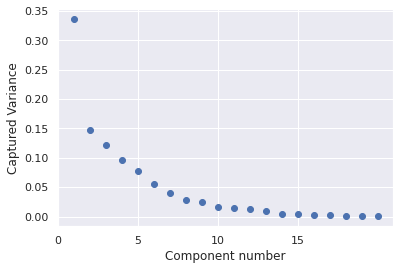

In [198]:
from sklearn.decomposition import PCA

def pca_scree_plot(X, max_components=100):
    max_components = min(X.shape[1], max_components)
    pca = PCA(n_components=max_components)
    pca.fit(X)
    component_numbers = np.arange(1, max_components + 1)
    plt.scatter(component_numbers, pca.explained_variance_ratio_)
    plt.xticks(range(0, max_components, 5))
    plt.xlabel('Component number')
    plt.ylabel('Captured Variance')
max_components = 20
pca_scree_plot(scaled_train, max_components = 100)
plt.show()
pca_scree_plot(f_regression_select, max_components = max_components)
plt.show()
pca_scree_plot(mutual_info_regression_select, max_components = max_components)

# Run DBScan and KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html